<a href="https://colab.research.google.com/github/BethanyJep/Worldview-of-Happiness/blob/main/Bethany's_Worldview_of_Happiness_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#adding google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df15 = pd.read_csv('/content/drive/My Drive/KamiLimu Group Work/2015.csv')
df15['year'] = 2015
df16 = pd.read_csv('/content/drive/My Drive/KamiLimu Group Work/2016.csv')
df16['year'] = 2016
df17 = pd.read_csv('/content/drive/My Drive/KamiLimu Group Work/2017.csv')
df17['year'] = 2017
df18 = pd.read_csv('/content/drive/My Drive/KamiLimu Group Work/2018.csv')
df18['year'] = 2018
df19 = pd.read_csv('/content/drive/My Drive/KamiLimu Group Work/2019.csv')
df19['year'] = 2019
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
df = pd.concat([df15, df16, df17, df18, df19])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['Countries'] = df.pop("Country").fillna(df.pop("Country or region"))
df['Free'] = df.pop("Freedom").fillna(df.pop("Freedom to make life choices"))
df['familySupport'] = df.pop("Family").fillna(df.pop("Social support"))
df['Health'] = df.pop("Health (Life Expectancy)").fillna(df.pop("Healthy life expectancy"))
df['Economy'] = df.pop("Economy (GDP per Capita)").fillna(df.pop("GDP per capita"))
df['happinessRank'] = df.pop("Happiness Rank").fillna(df.pop("Happiness.Rank"))
df['happinessScore'] = df.pop("Happiness Score").fillna(df.pop("Happiness.Score"))
df['dystopiaResidual'] = df.pop("Dystopia Residual").fillna(df.pop("Dystopia.Residual"))
df['Corruption'] = df.pop("Perceptions of corruption").fillna(df.pop("Trust..Government.Corruption."))
df['lowInterval'] = df.pop("Lower Confidence Interval").fillna(df.pop("Whisker.low"))
df['highInterval'] = df.pop("Upper Confidence Interval").fillna(df.pop("Whisker.high"))
df.head()

,Region,Standard Error,Trust (Government Corruption),Generosity,year,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Overall rank,Score,Countries,Free,familySupport,Health,Economy,happinessRank,happinessScore,dystopiaResidual,Corruption,lowInterval,highInterval
0,Western Europe,0.03411,0.41978,0.29678,2015,NaN,NaN,NaN,NaN,Switzerland,0.66557,1.34951,0.94143,1.39651,1.0,7.587,2.51738,NaN,NaN,NaN
1,Western Europe,0.04884,0.14145,0.43630,2015,NaN,NaN,NaN,NaN,Iceland,0.62877,1.40223,0.94784,1.30232,2.0,7.561,2.70201,NaN,NaN,NaN
2,Western Europe,0.03328,0.48357,0.34139,2015,NaN,NaN,NaN,NaN,Denmark,0.64938,1.36058,0.87464,1.32548,3.0,7.527,2.49204,NaN,NaN,NaN
3,Western Europe,0.03880,0.36503,0.34699,2015,NaN,NaN,NaN,NaN,Norway,0.66973,1.33095,0.88521,1.45900,4.0,7.522,2.46531,NaN,NaN,NaN
4,North America,0.03553,0.32957,0.45811,2015,NaN,NaN,NaN,NaN,Canada,0.63297,1.32261,0.90563,1.32629,5.0,7.427,2.45176,NaN,NaN,NaN


In [6]:
df['GDP'] = df.pop("Economy..GDP.per.Capita.").fillna(df.pop("Economy"))
df['lifeExpectancy'] = df.pop("Health..Life.Expectancy.").fillna(df.pop("Health"))
df['Government'] = df.pop("Trust (Government Corruption)").fillna(df.pop("Corruption"))
df['Happiness Rank'] = df.pop("happinessRank").fillna(df.pop("Overall rank"))
df['Happiness Score'] = df.pop("happinessScore").fillna(df.pop("Score"))
df.head()

,Region,Standard Error,Generosity,year,Countries,Free,familySupport,dystopiaResidual,lowInterval,highInterval,GDP,lifeExpectancy,Government,Happiness Rank,Happiness Score
0,Western Europe,0.03411,0.29678,2015,Switzerland,0.66557,1.34951,2.51738,NaN,NaN,1.39651,0.94143,0.41978,1.0,7.587
1,Western Europe,0.04884,0.43630,2015,Iceland,0.62877,1.40223,2.70201,NaN,NaN,1.30232,0.94784,0.14145,2.0,7.561
2,Western Europe,0.03328,0.34139,2015,Denmark,0.64938,1.36058,2.49204,NaN,NaN,1.32548,0.87464,0.48357,3.0,7.527
3,Western Europe,0.03880,0.34699,2015,Norway,0.66973,1.33095,2.46531,NaN,NaN,1.45900,0.88521,0.36503,4.0,7.522
4,North America,0.03553,0.45811,2015,Canada,0.63297,1.32261,2.45176,NaN,NaN,1.32629,0.90563,0.32957,5.0,7.427


In [7]:
#Why are you renaming standard error as interval error?
df['Interval'] = df['highInterval'] - df['lowInterval']
df['intervalError'] = df.pop("Interval").fillna(df.pop("Standard Error"))
df.head()

,Region,Generosity,year,Countries,Free,familySupport,dystopiaResidual,lowInterval,highInterval,GDP,lifeExpectancy,Government,Happiness Rank,Happiness Score,intervalError
0,Western Europe,0.29678,2015,Switzerland,0.66557,1.34951,2.51738,NaN,NaN,1.39651,0.94143,0.41978,1.0,7.587,0.03411
1,Western Europe,0.43630,2015,Iceland,0.62877,1.40223,2.70201,NaN,NaN,1.30232,0.94784,0.14145,2.0,7.561,0.04884
2,Western Europe,0.34139,2015,Denmark,0.64938,1.36058,2.49204,NaN,NaN,1.32548,0.87464,0.48357,3.0,7.527,0.03328
3,Western Europe,0.34699,2015,Norway,0.66973,1.33095,2.46531,NaN,NaN,1.45900,0.88521,0.36503,4.0,7.522,0.03880
4,North America,0.45811,2015,Canada,0.63297,1.32261,2.45176,NaN,NaN,1.32629,0.90563,0.32957,5.0,7.427,0.03553


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            315 non-null    object 
 1   Generosity        782 non-null    float64
 2   year              782 non-null    int64  
 3   Countries         782 non-null    object 
 4   Free              782 non-null    float64
 5   familySupport     782 non-null    float64
 6   dystopiaResidual  470 non-null    float64
 7   lowInterval       312 non-null    float64
 8   highInterval      312 non-null    float64
 9   GDP               782 non-null    float64
 10  lifeExpectancy    782 non-null    float64
 11  Government        781 non-null    float64
 12  Happiness Rank    782 non-null    float64
 13  Happiness Score   782 non-null    float64
 14  intervalError     470 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 97.8+ KB


In [9]:
df.describe()

,Generosity,year,Free,familySupport,dystopiaResidual,lowInterval,highInterval,GDP,lifeExpectancy,Government,Happiness Rank,Happiness Score,intervalError
count,782.000000,782.000000,782.000000,782.000000,470.000000,312.000000,312.000000,782.000000,782.000000,781.000000,782.000000,782.000000,470.000000
mean,0.218576,2016.993606,0.411091,1.078392,2.092717,5.269139,5.467245,0.916047,0.612416,0.125436,78.698210,5.379018,0.147606
std,0.122321,1.417364,0.152880,0.329548,0.565772,1.144780,1.125895,0.407340,0.248309,0.105816,45.182384,1.127456,0.094229
min,0.000000,2015.000000,0.000000,0.000000,0.328580,2.521116,2.864884,0.000000,0.000000,0.000000,1.000000,2.693000,0.018480
25%,0.130000,2016.000000,0.309768,0.869363,1.737975,4.366000,4.551835,0.606500,0.440183,0.054000,40.000000,4.509750,0.052260
50%,0.201982,2017.000000,0.431000,1.124735,2.094640,5.211295,5.394889,0.982205,0.647310,0.091000,79.000000,5.322000,0.154114
75%,0.278832,2018.000000,0.531000,1.327250,2.455575,6.086750,6.382650,1.236187,0.808000,0.156030,118.000000,6.189500,0.192000
max,0.838075,2019.000000,0.724000,1.644000,3.837720,7.479556,7.669000,2.096000,1.141000,0.551910,158.000000,7.769000,0.540798


In [10]:
df.corr()

,Generosity,year,Free,familySupport,dystopiaResidual,lowInterval,highInterval,GDP,lifeExpectancy,Government,Happiness Rank,Happiness Score,intervalError
Generosity,1.000000,-0.192587,0.290706,-0.037262,-0.114468,0.156253,0.155225,-0.014560,0.010638,0.318920,-0.117713,0.137578,-0.014457
year,-0.192587,1.000000,0.010353,0.367431,-0.177951,-0.011672,-0.013188,0.019768,0.130302,-0.122264,-0.007768,0.007065,0.646837
Free,0.290706,0.010353,1.000000,0.420361,0.038422,0.562123,0.561560,0.340511,0.340745,0.459593,-0.537942,0.551258,-0.178342
familySupport,-0.037262,0.367431,0.420361,1.000000,-0.081537,0.600899,0.596508,0.585966,0.572650,0.126401,-0.644842,0.648799,-0.129841
dystopiaResidual,-0.114468,-0.177951,0.038422,-0.081537,1.000000,0.465346,0.473915,0.030087,0.057674,0.000001,-0.482706,0.489747,0.005189
lowInterval,0.156253,-0.011672,0.562123,0.600899,0.465346,1.000000,0.997954,0.800404,0.777766,0.416764,-0.992989,0.999497,-0.282369
highInterval,0.155225,-0.013188,0.561560,0.596508,0.473915,0.997954,1.000000,0.799216,0.768521,0.411446,-0.994027,0.999480,-0.220456
GDP,-0.014560,0.019768,0.340511,0.585966,0.030087,0.800404,0.799216,1.000000,0.784338,0.306307,-0.794791,0.789284,-0.023276
lifeExpectancy,0.010638,0.130302,0.340745,0.572650,0.057674,0.777766,0.768521,0.784338,1.000000,0.250512,-0.743655,0.742456,-0.303166
Government,0.318920,-0.122264,0.459593,0.126401,0.000001,0.416764,0.411446,0.306307,0.250512,1.000000,-0.372781,0.398418,-0.146725


In [11]:
# df.groupby('Region')['Countries'].fillna(method='bfill')
df.tail()

,Region,Generosity,year,Countries,Free,familySupport,dystopiaResidual,lowInterval,highInterval,GDP,lifeExpectancy,Government,Happiness Rank,Happiness Score,intervalError
151,NaN,0.217,2019,Rwanda,0.555,0.711,NaN,NaN,NaN,0.359,0.614,0.411,152.0,3.334,NaN
152,NaN,0.276,2019,Tanzania,0.417,0.885,NaN,NaN,NaN,0.476,0.499,0.147,153.0,3.231,NaN
153,NaN,0.158,2019,Afghanistan,0.000,0.517,NaN,NaN,NaN,0.350,0.361,0.025,154.0,3.203,NaN
154,NaN,0.235,2019,Central African Republic,0.225,0.000,NaN,NaN,NaN,0.026,0.105,0.035,155.0,3.083,NaN
155,NaN,0.202,2019,South Sudan,0.010,0.575,NaN,NaN,NaN,0.306,0.295,0.091,156.0,2.853,NaN


In [12]:
df.groupby(['Region', 'Countries']).count()

Generosity  ...  intervalError
Region                     Countries                   ...               
Australia and New Zealand  Australia                2  ...              2
                           New Zealand              2  ...              2
Central and Eastern Europe Albania                  2  ...              2
                           Armenia                  2  ...              2
                           Azerbaijan               2  ...              2
...                                               ...  ...            ...
Western Europe             Portugal                 2  ...              2
                           Spain                    2  ...              2
                           Sweden                   2  ...              2
                           Switzerland              2  ...              2
                           United Kingdom           2  ...              2

[164 rows x 13 columns]

In [13]:
df = df.convert_dtypes()
df.dtypes

Region               string
Generosity          float64
year                  Int64
Countries            string
Free                float64
familySupport       float64
dystopiaResidual    float64
lowInterval         float64
highInterval        float64
GDP                 float64
lifeExpectancy      float64
Government          float64
Happiness Rank        Int64
Happiness Score     float64
intervalError       float64
dtype: object

In [14]:
df.nunique()


Region               10
Generosity          664
year                  5
Countries           170
Free                697
familySupport       732
dystopiaResidual    470
lowInterval         309
highInterval        309
GDP                 742
lifeExpectancy      705
Government          635
Happiness Rank      158
Happiness Score     716
intervalError       422
dtype: int64

In [15]:
df = df.drop(['highInterval', 'lowInterval', 'intervalError', 'Region'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Generosity        782 non-null    float64
 1   year              782 non-null    Int64  
 2   Countries         782 non-null    string 
 3   Free              782 non-null    float64
 4   familySupport     782 non-null    float64
 5   dystopiaResidual  470 non-null    float64
 6   GDP               782 non-null    float64
 7   lifeExpectancy    782 non-null    float64
 8   Government        781 non-null    float64
 9   Happiness Rank    782 non-null    Int64  
 10  Happiness Score   782 non-null    float64
dtypes: Int64(2), float64(8), string(1)
memory usage: 74.8 KB


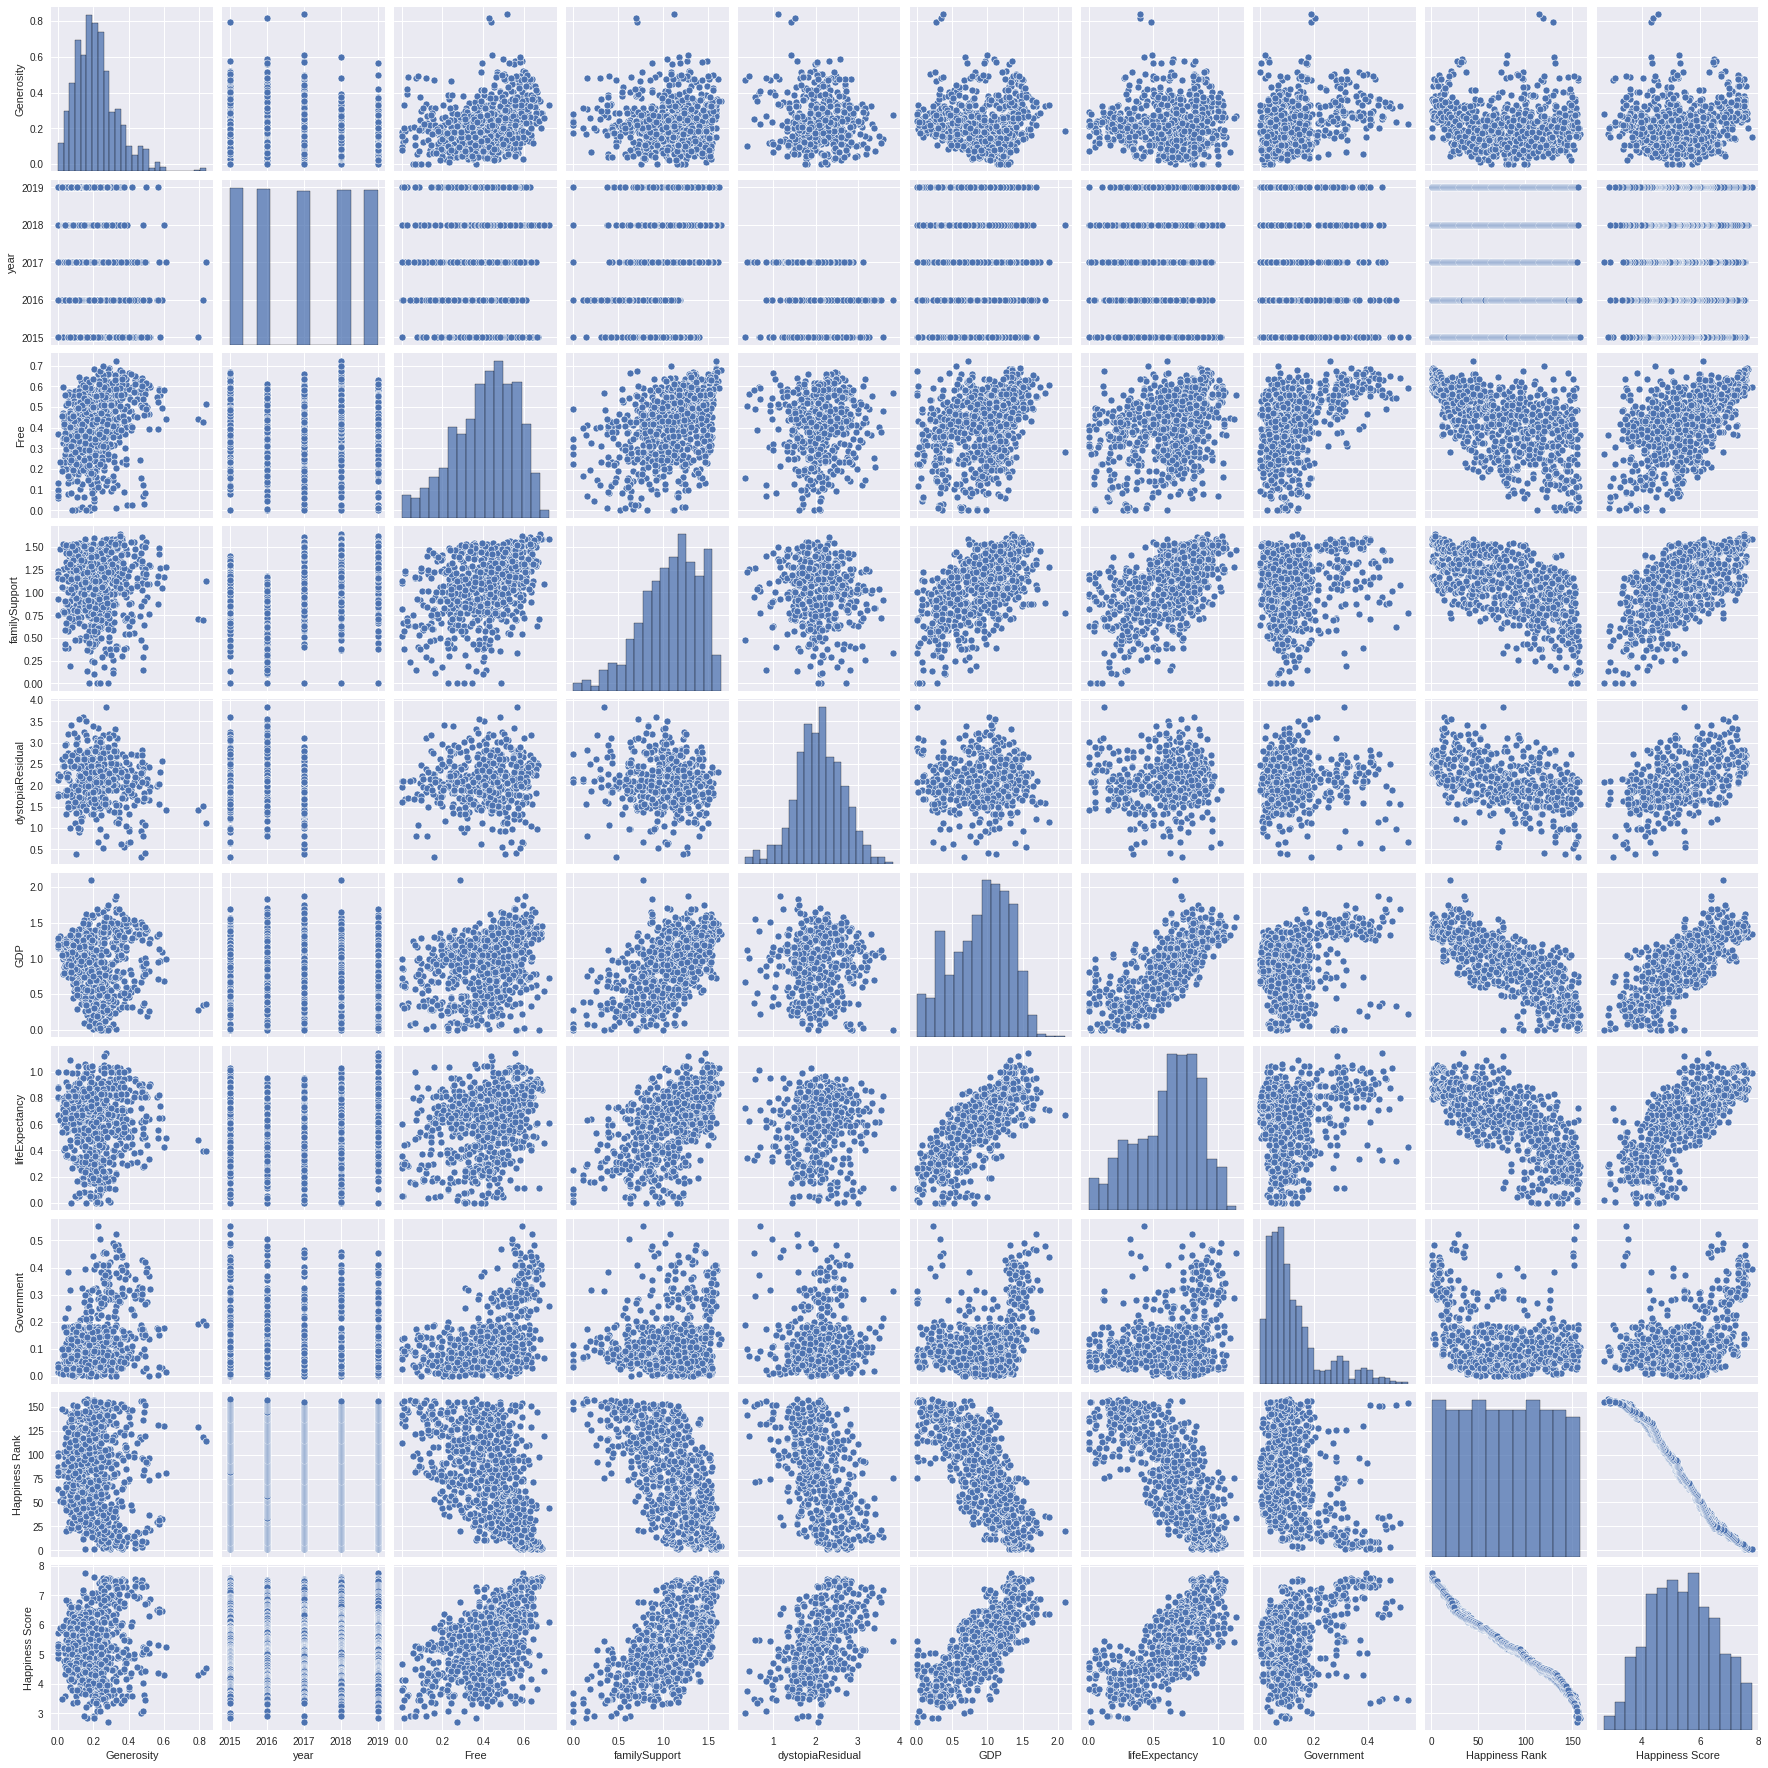

In [19]:
#plt.style.available
plt.style.use('seaborn')

sns.pairplot(df)

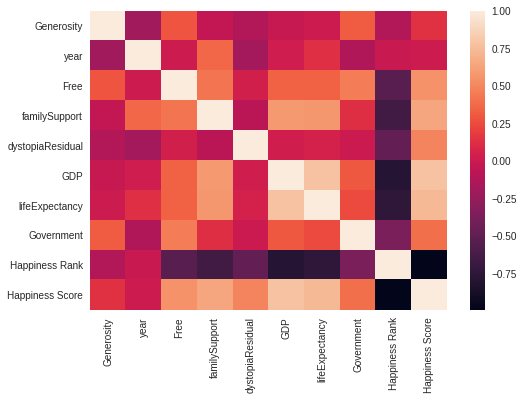

In [17]:
sns.heatmap(df.corr())
plt.show()

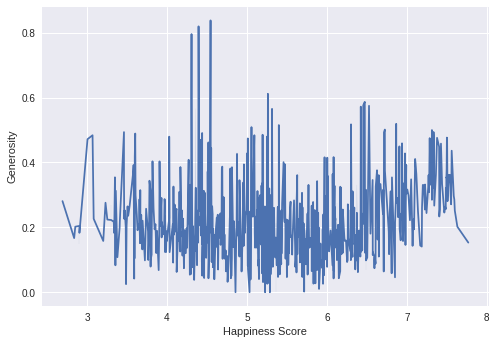

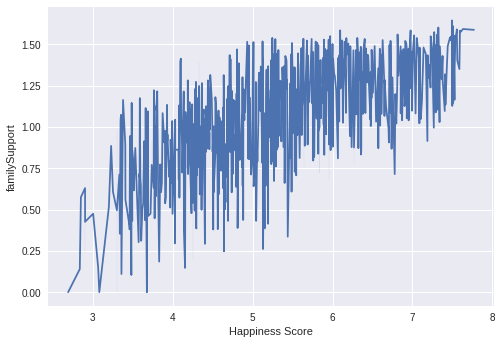

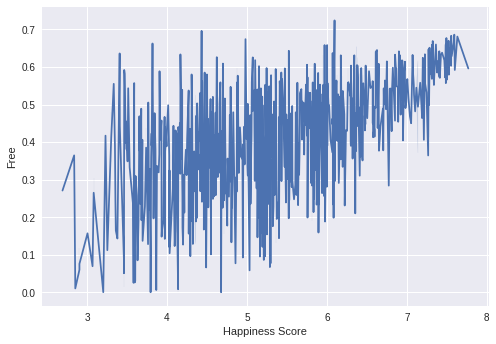

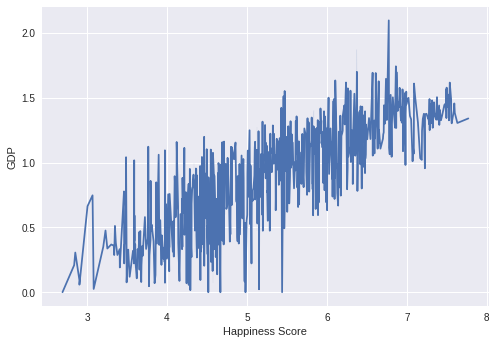

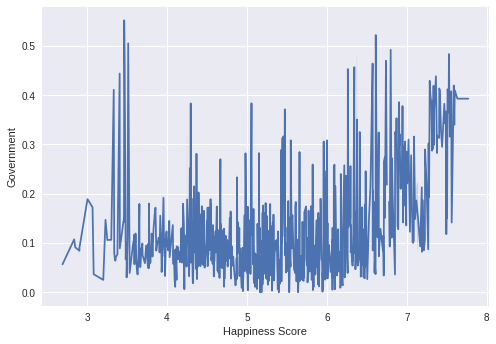

In [20]:
sns.lineplot(y='Generosity', x='Happiness Score', data=df)
plt.show()

sns.lineplot(y='familySupport', x='Happiness Score', data=df)
plt.show()

sns.lineplot(y='Free', x='Happiness Score', data=df)
plt.show()

sns.lineplot(y='GDP', x='Happiness Score', data=df)
plt.show()

sns.lineplot(y='Government', x='Happiness Score', data=df)
plt.show()

In [ ]:
#Exporting data to my drive 
# df.to_csv('cleanView.csv')
# !cp cleanView.csv "drive/My Drive/KamiLimu Group Work/"